<h1 align='center'>Bank Customer Churn Prediction Using Artificial Neural Networks (ANN)</h1>

###### By: [jihad akbar](https://github.com/jihadakbr) | Dataset: [Bank Customer Churn Modelling (Kaggle)](https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling)

# Table of Contents

1. Content of Dataset
2. Importing Required Libraries
3. Reading the CSV File
4. Exploring the Data<br>
4a. The number of rows and columns<br>
4b. Data distribution<br>
4c. Unique values for each feature<br>
5. Data Cleaning<br>
5a. Checking Datatype<br>
5b. Checking Missing Value<br>
5c. Checking Duplicated Value<br>
5d. Deleting Unnecessary Columns<br>
5e. Checking Outliers<br>
6. Data Visualization<br>
6a. Numerical Data Distribution<br>
6b. Categorical Data Distribution<br>
6c. Target Variable Distribution<br>
6d. Numerical Data Correlation<br>
7. Chi Square Test (Non-Parametric Hypothesis Testing)
8. Dummy encoding
9. Splitting The Dataset into The Training Set and Test Set
10. Feature Scaling
11. Building the Neural Network Model
12. Making the Confusion Matrix
13. Saving the Trained Model

# 1. Content of Dataset

1. RowNumber: the index of the row in the data
2. CustomerId: unique customer identifier
3. Surname: surname
4. CreditScore: credit rating
5. Geography: country of residence
6. Gender: gender
7. Age: age
8. Tenure: how many years a person has been a client of the bank
9. Balance: account balance
10. NumOfProducts: the number of bank products used by the client
11. HasCrCard: availability of a credit card
12. IsActiveMember: client activity
13. EstimatedSalary: estimated salary
14. Exited: the fact of the client's departure **(target variable)**<br>
* Exited = 1
* Not Exited = 0

# 2. Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *

# 3. Reading the CSV File

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4. Exploring the Data

## 4a. The number of rows and columns

In [3]:
data.shape

(10000, 14)

## 4b. Data distribution

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 4c. Unique values for each feature

In [5]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# 5. Data Cleaning

## 5a. Checking Datatype

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 5b. Checking Missing Value

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 5c. Checking Duplicated Value

In [8]:
data.duplicated().sum()

0

There are no missing values and duplicates in the dataset.

## 5d. Deleting Unnecessary Columns

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## 5e. Checking Outliers

In [11]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


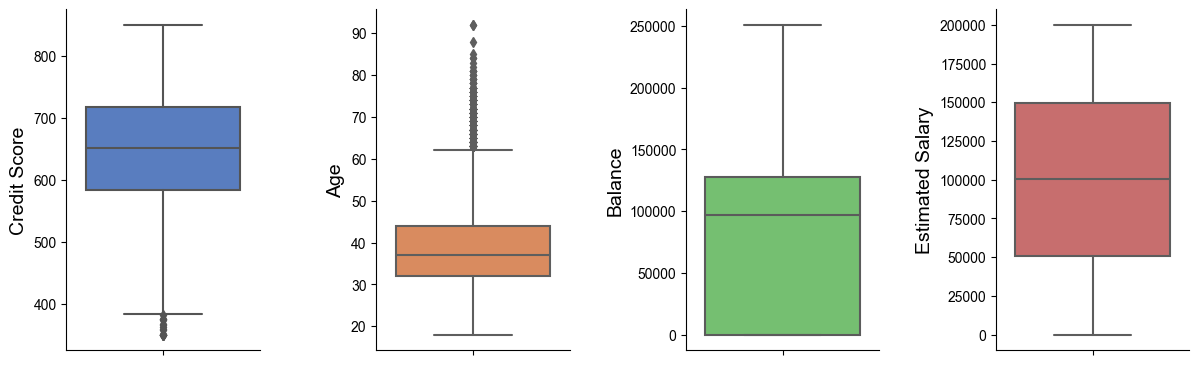

In [12]:
fig, ax = outliers_subplot(data,"CreditScore", "Age", "Balance", "EstimatedSalary")
plt.show()

In [13]:
for i in range(5):
    data = filter_outliers(data, "Age")
    data = filter_outliers(data, "CreditScore")
    print(f"Outliers remover running ({i+1} times)")

Outliers remover running (1 times)
Outliers remover running (2 times)
Outliers remover running (3 times)
Outliers remover running (4 times)
Outliers remover running (5 times)


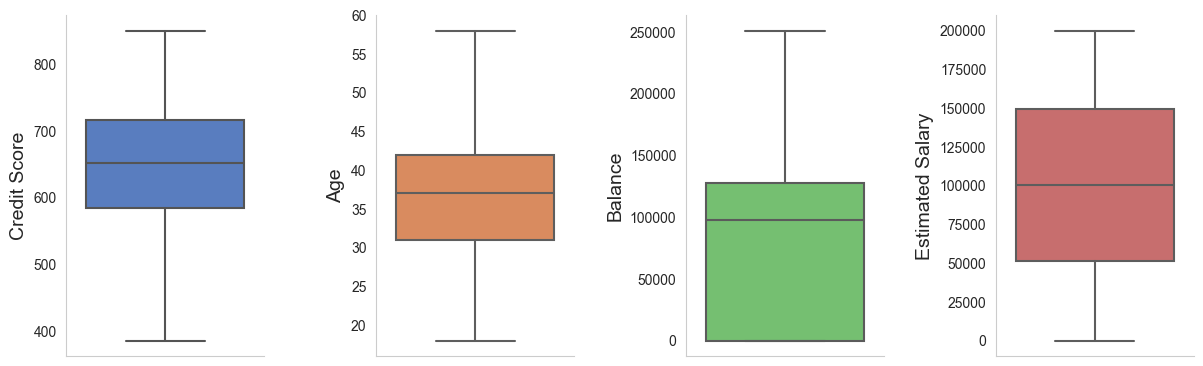

In [14]:
fig, ax = outliers_subplot(data,"CreditScore", "Age", "Balance", "EstimatedSalary")
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9397 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9397 non-null   int64  
 1   Geography        9397 non-null   object 
 2   Gender           9397 non-null   object 
 3   Age              9397 non-null   int64  
 4   Tenure           9397 non-null   int64  
 5   Balance          9397 non-null   float64
 6   NumOfProducts    9397 non-null   int64  
 7   HasCrCard        9397 non-null   int64  
 8   IsActiveMember   9397 non-null   int64  
 9   EstimatedSalary  9397 non-null   float64
 10  Exited           9397 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 881.0+ KB


In [16]:
print("Removed Outliers Data = " + str((10000 - 9397) / 10000 * 100) + "%")

Removed Outliers Data = 6.03%


# 6. Data Visualization

## 6a. Numerical Data Distribution

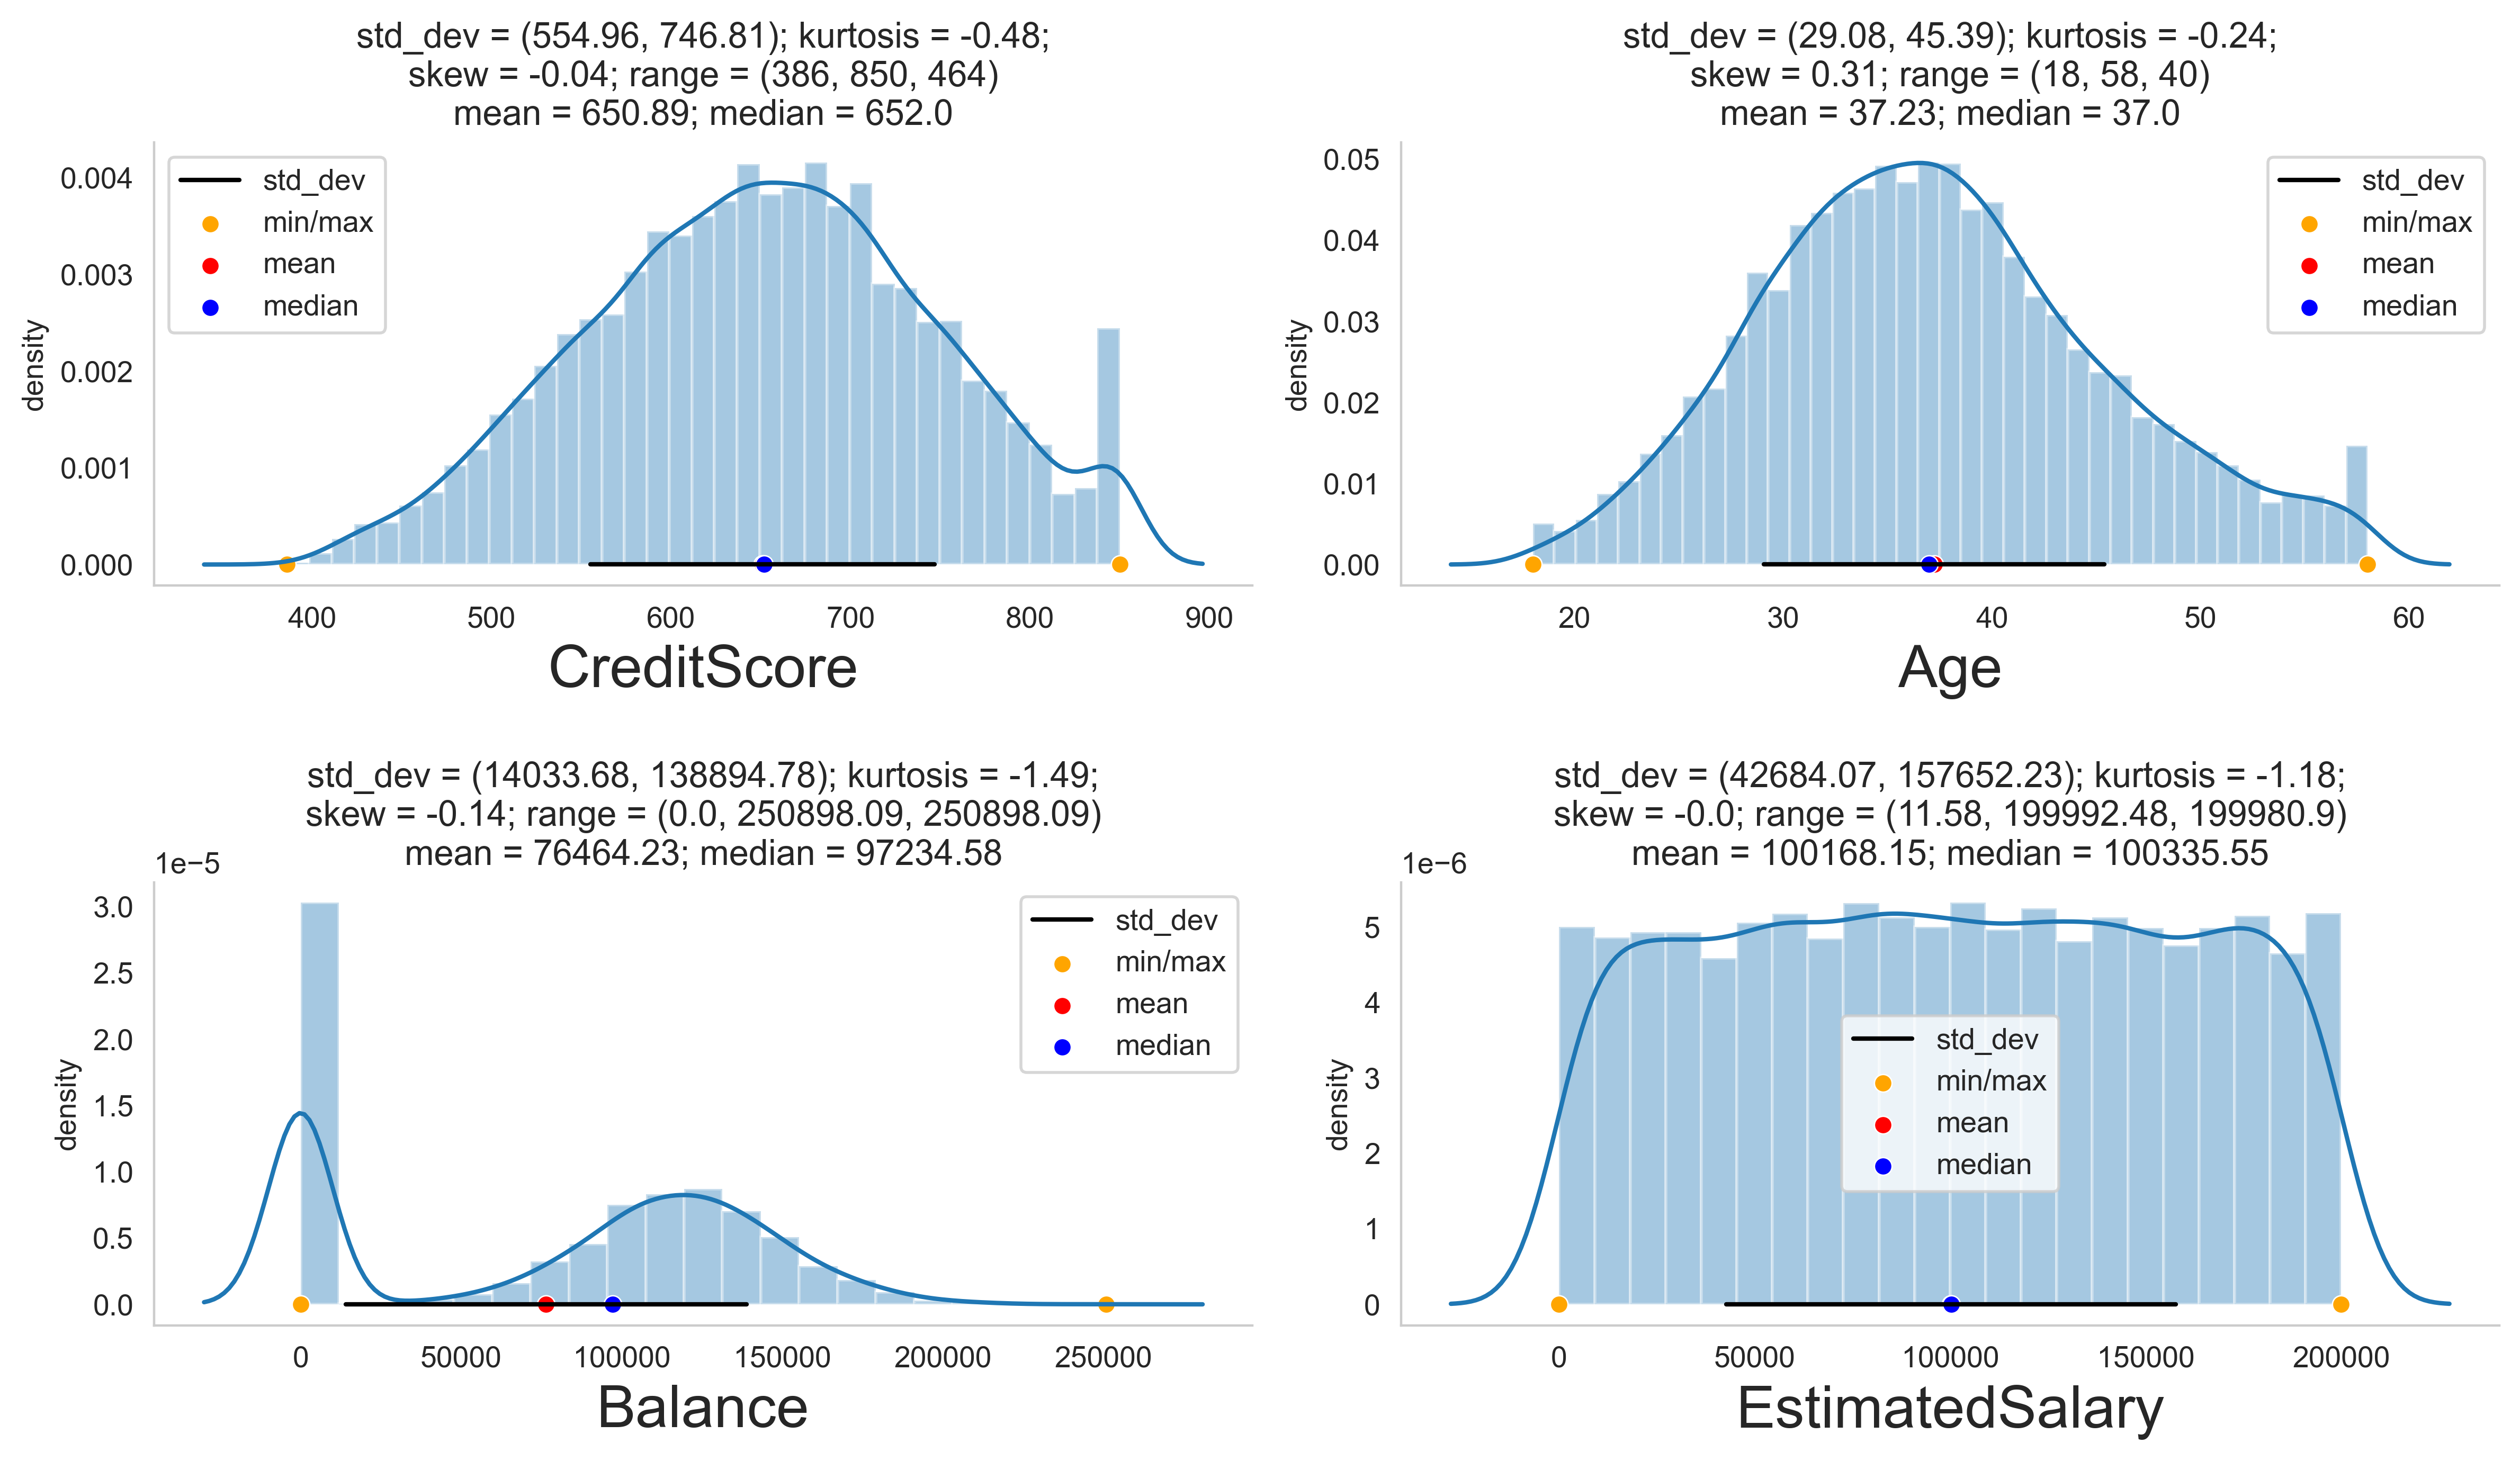

In [17]:
num_dist(data[["CreditScore", "Age", "Balance", "EstimatedSalary"]])

## 6b. Categorical Data Distribution

In [18]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
data.nunique()

CreditScore         448
Geography             3
Gender                2
Age                  41
Tenure               11
Balance            5993
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9396
Exited                2
dtype: int64

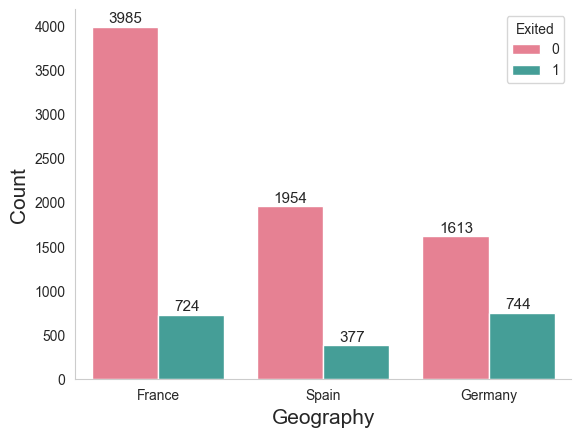

In [20]:
cat_dist(data, "Geography", "Exited", "husl")

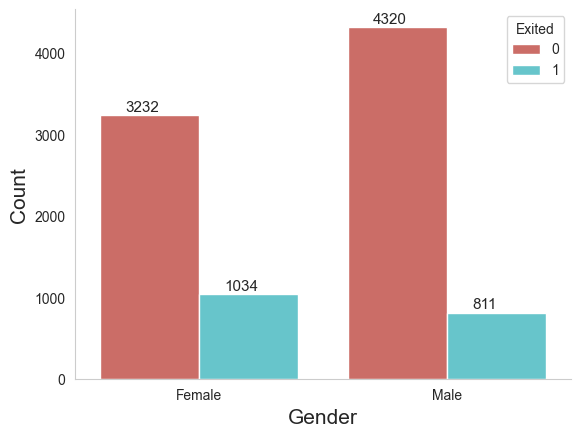

In [21]:
cat_dist(data, "Gender", "Exited", "hls")

## 6c. Target Variable Distribution

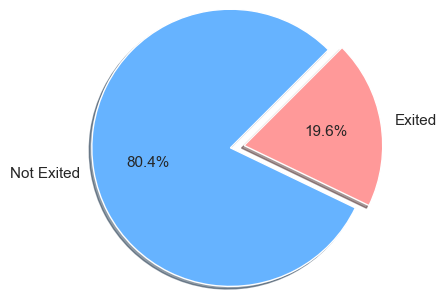

In [22]:
target_dist(data,"Exited","Not Exited","Exited")

## 6d. Numerical Data Correlation

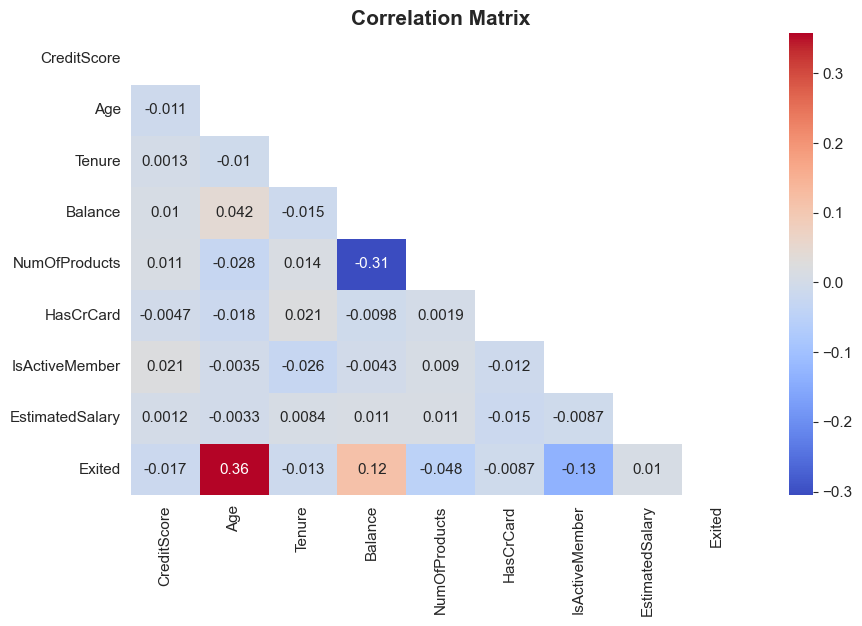

In [23]:
num_corr(data)

There is a high correlation between Age (36%) and Balance (12%) to Exited.

# 7.  Chi Square Test (Non-Parametric Hypothesis Testing)

In [24]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

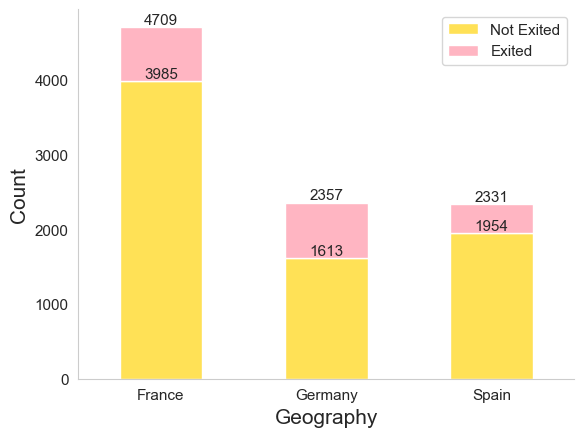

In [25]:
stack_hist_ct(data,"Geography","Exited","#FFE156", "#FFB5C2","Not Exited","Exited")

In [26]:
chi_square_test(data,"Geography","Exited")

p-value is:  1.6789123555680562e-62
Dependent (reject H0)
This feature is dependent on the target variable.


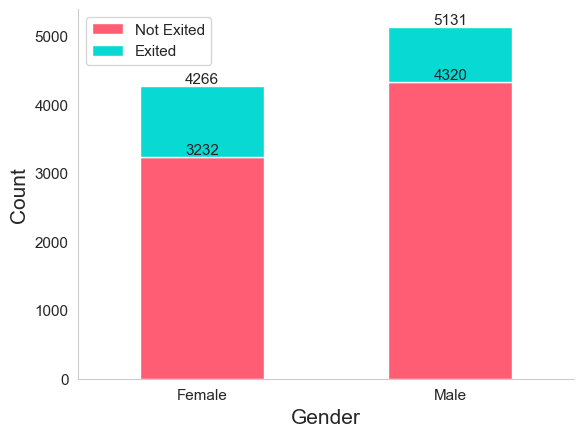

In [27]:
stack_hist_ct(data,"Gender","Exited","#FF5D73", "#08D9D2","Not Exited","Exited")

In [28]:
chi_square_test(data,"Gender","Exited")

p-value is:  1.627626420699709e-24
Dependent (reject H0)
This feature is dependent on the target variable.


# 8. Dummy encoding

In [29]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
data = pd.get_dummies(data, columns=['Geography','Gender'], drop_first=True)

In [31]:
data.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [32]:
column = data.pop('Exited')
data = data.assign(Exited=column)

In [33]:
data.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.0,1,1,1,101348.88,0,0,0,1


In [34]:
# For testing the Model
data.to_csv('Data Testing for the Model.csv')

# 9. Splitting The Dataset into The Training Set and Test Set

In [35]:
X = data.drop(columns='Exited', axis=1)
y = data['Exited']

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state = 42)

In [37]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (7517, 11), (7517,)
testing shapes: (1880, 11), (1880,)


# 10. Feature Scaling

In [38]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
joblib.dump(scaler, 'scalerDeepNN.joblib')

['scalerDeepNN.joblib']

# 11. Building the Neural Network Model

In [40]:
n_features = len(X.columns)

In [41]:
inputs = layers.Input(name="input", shape=(n_features,))

h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)

outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h1)

model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 11)]              0         
                                                                 
 h1 (Dense)                  (None, 6)                 72        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',F1])

In [43]:
training = model.fit(x=X_train, y=y_train, batch_size=32, epochs=200, shuffle=True, verbose=1, validation_split=0.3)

Epoch 1/200
165/165 [==============================] - 3s 6ms/step - loss: 0.6648 - accuracy: 0.6628 - F1: 0.2989 - val_loss: 0.5320 - val_accuracy: 0.7744 - val_F1: 0.2911
Epoch 2/200
165/165 [==============================] - 1s 4ms/step - loss: 0.5310 - accuracy: 0.7607 - F1: 0.2729 - val_loss: 0.4760 - val_accuracy: 0.7992 - val_F1: 0.2463
Epoch 3/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4811 - accuracy: 0.7955 - F1: 0.3042 - val_loss: 0.4545 - val_accuracy: 0.8107 - val_F1: 0.2575
Epoch 4/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.8038 - F1: 0.2933 - val_loss: 0.4429 - val_accuracy: 0.8103 - val_F1: 0.2745
Epoch 5/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4581 - accuracy: 0.8048 - F1: 0.2883 - val_loss: 0.4355 - val_accuracy: 0.8147 - val_F1: 0.2879
Epoch 6/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.8132 - F1: 0.3015 - val_loss: 0.4308 - 

165/165 [==============================] - 1s 4ms/step - loss: 0.3757 - accuracy: 0.8415 - F1: 0.4622 - val_loss: 0.3749 - val_accuracy: 0.8431 - val_F1: 0.4186
Epoch 49/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3714 - accuracy: 0.8411 - F1: 0.4698 - val_loss: 0.3740 - val_accuracy: 0.8431 - val_F1: 0.4165
Epoch 50/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3743 - accuracy: 0.8394 - F1: 0.4611 - val_loss: 0.3736 - val_accuracy: 0.8431 - val_F1: 0.4169
Epoch 51/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3782 - accuracy: 0.8396 - F1: 0.4761 - val_loss: 0.3744 - val_accuracy: 0.8440 - val_F1: 0.4103
Epoch 52/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3725 - accuracy: 0.8413 - F1: 0.4619 - val_loss: 0.3732 - val_accuracy: 0.8453 - val_F1: 0.4170
Epoch 53/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3791 - accuracy: 0.8396 - F1: 0.4303 - val_loss: 0.3728 - val_acc

165/165 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8476 - F1: 0.4753 - val_loss: 0.3553 - val_accuracy: 0.8546 - val_F1: 0.4708
Epoch 96/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8466 - F1: 0.4665 - val_loss: 0.3549 - val_accuracy: 0.8537 - val_F1: 0.4714
Epoch 97/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8489 - F1: 0.4915 - val_loss: 0.3550 - val_accuracy: 0.8537 - val_F1: 0.4659
Epoch 98/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3618 - accuracy: 0.8481 - F1: 0.4706 - val_loss: 0.3553 - val_accuracy: 0.8551 - val_F1: 0.4713
Epoch 99/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3575 - accuracy: 0.8491 - F1: 0.4827 - val_loss: 0.3547 - val_accuracy: 0.8537 - val_F1: 0.4735
Epoch 100/200
165/165 [==============================] - 1s 4ms/step - loss: 0.3619 - accuracy: 0.8483 - F1: 0.4917 - val_loss: 0.3548 - val_ac

Epoch 142/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8489 - F1: 0.4843 - val_loss: 0.3541 - val_accuracy: 0.8546 - val_F1: 0.4697
Epoch 143/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8485 - F1: 0.4916 - val_loss: 0.3552 - val_accuracy: 0.8542 - val_F1: 0.4559
Epoch 144/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3564 - accuracy: 0.8479 - F1: 0.4700 - val_loss: 0.3547 - val_accuracy: 0.8555 - val_F1: 0.4650
Epoch 145/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8498 - F1: 0.4891 - val_loss: 0.3542 - val_accuracy: 0.8568 - val_F1: 0.4725
Epoch 146/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8561 - F1: 0.5133 - val_loss: 0.3540 - val_accuracy: 0.8537 - val_F1: 0.4681
Epoch 147/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8477 - F1: 0.4868 - val_los

Epoch 189/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8510 - F1: 0.4956 - val_loss: 0.3538 - val_accuracy: 0.8546 - val_F1: 0.4676
Epoch 190/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8498 - F1: 0.4837 - val_loss: 0.3544 - val_accuracy: 0.8546 - val_F1: 0.4622
Epoch 191/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8517 - F1: 0.4903 - val_loss: 0.3538 - val_accuracy: 0.8542 - val_F1: 0.4630
Epoch 192/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8498 - F1: 0.4901 - val_loss: 0.3545 - val_accuracy: 0.8551 - val_F1: 0.4634
Epoch 193/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8521 - F1: 0.5141 - val_loss: 0.3543 - val_accuracy: 0.8559 - val_F1: 0.4683
Epoch 194/200
165/165 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8483 - F1: 0.4900 - val_los

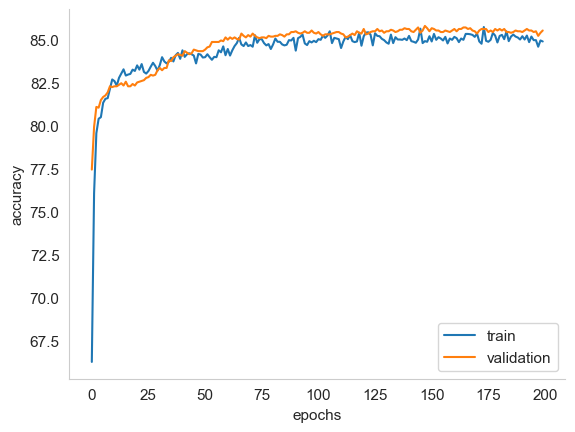

In [44]:
plot_metrics(training, "accuracy", "val_accuracy")

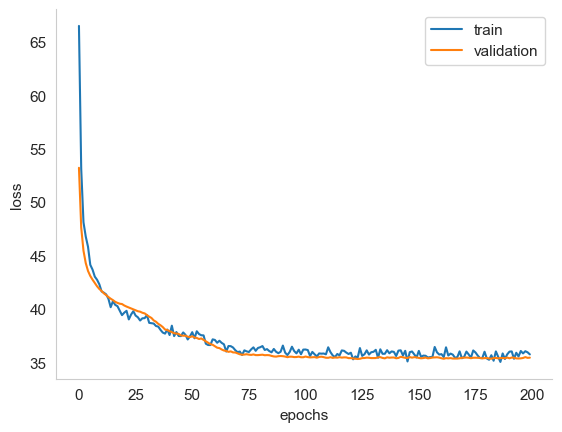

In [45]:
plot_metrics(training, "loss", "val_loss")

In [46]:
loss, accuracy, F1 = model.evaluate(X_test, y_test, verbose=0)
print(f"accuracy = {accuracy}")
print(f"loss = {loss}")
print(f"F1 = {F1}")

accuracy = 0.8696808218955994
loss = 0.3428347706794739
F1 = 0.503558874130249


# 12. Making the Confusion Matrix

In [47]:
y_pred = model.predict(X_test)

59/59 [==============================] - 0s 2ms/step


In [48]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)

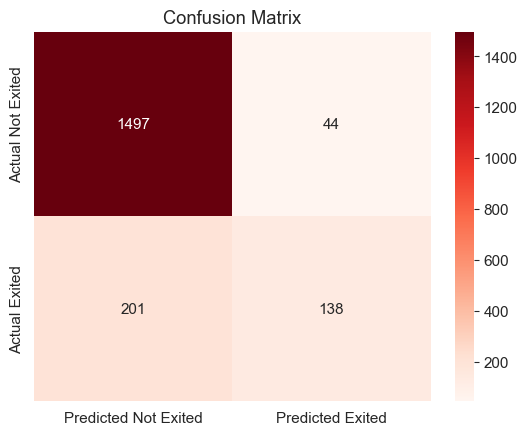

In [50]:
plot_confusion_matrix(y_test, y_pred, cmap='Reds')

In [51]:
# Extracting the accuracy from the confusion matrix
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('accuracy:', accuracy)

accuracy: 0.8696808510638298


##### Calculating it manually:
(1497 + 138) / (1497 + 138 + 201 + 44) = 0.8696808510638298

##### Conclusion:
**87.0%** of testing data was classified correctly

# 13. Saving the Trained Model

In [52]:
model.save('DeepNN.h5')